In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Customer/churn.csv')


In [ ]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df_n = df.rename(columns={'RowNumber': 'CustomerNum'})

In [ ]:
df_n.head(5)

,CustomerNum,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerNum      10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Graph for missing values

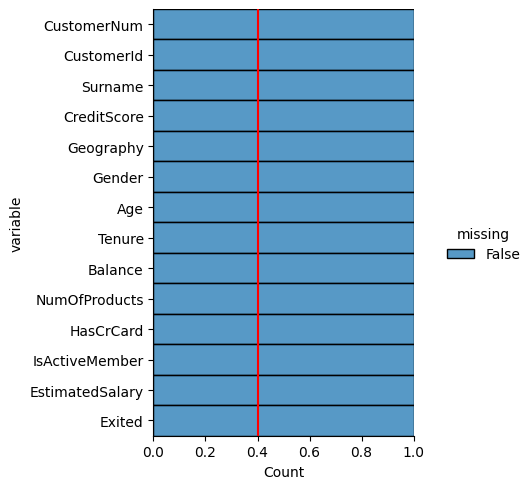

In [ ]:
sns.displot(
    data=df_n.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=5,
    aspect=0.9
)

# specifying a threshold value
plt.axvline(0.4, color='r')

Data Analysis

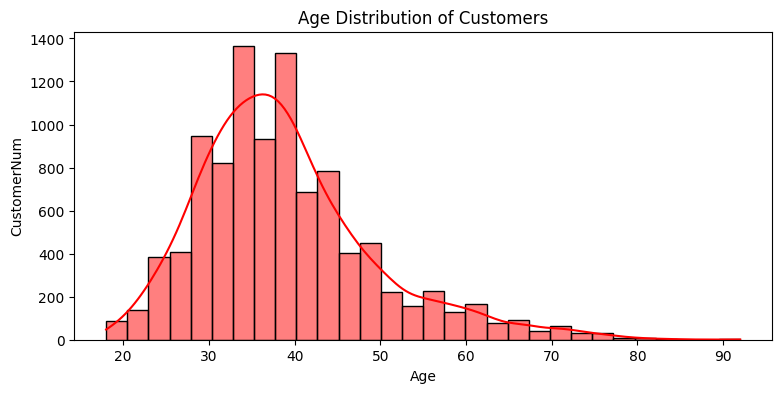

In [ ]:
plt.figure(figsize=(9, 4))
sns.histplot(df_n['Age'], bins=30, kde=True, color='red')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('CustomerNum')
plt.show()

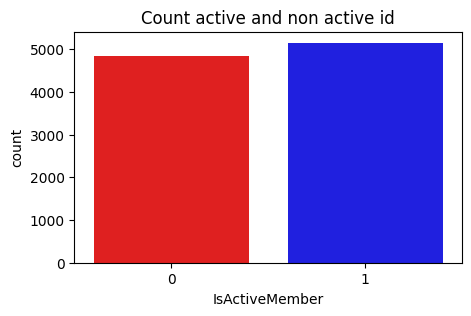

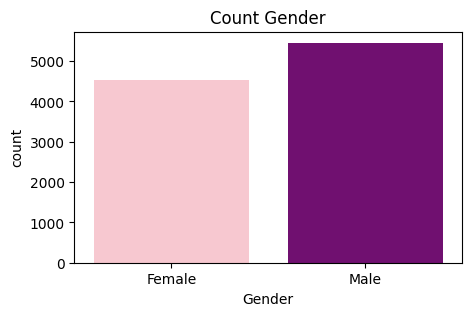

In [ ]:
#Active ID
color=["red","blue"]
plt.figure(figsize=(5, 3))
sns.countplot(x='IsActiveMember',data = df_n, palette=color)
plt.title('Count active and non active id')
plt.show()
#Gender
color=["pink","purple"]
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender',data = df_n, palette=color)
plt.title('Count Gender')
plt.show()


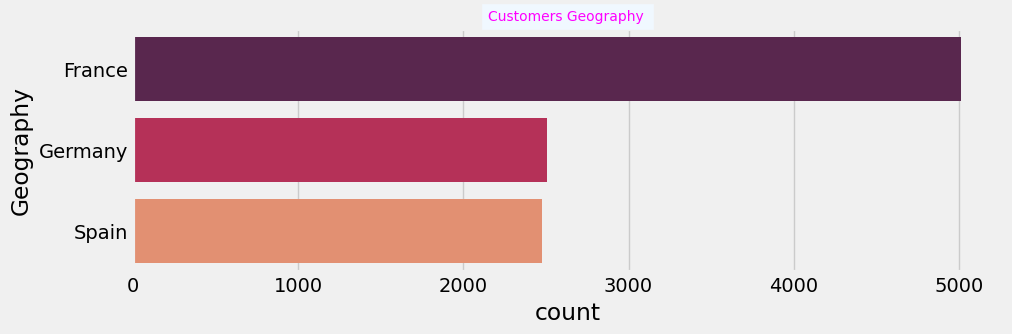

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,3))
chart=sns.countplot(y='Geography',data=df,palette='rocket', order = df_n['Geography'].value_counts()[:10].index)
plt.title("Customers Geography ",
          fontsize='10',
          backgroundcolor='AliceBlue',
          color='magenta');

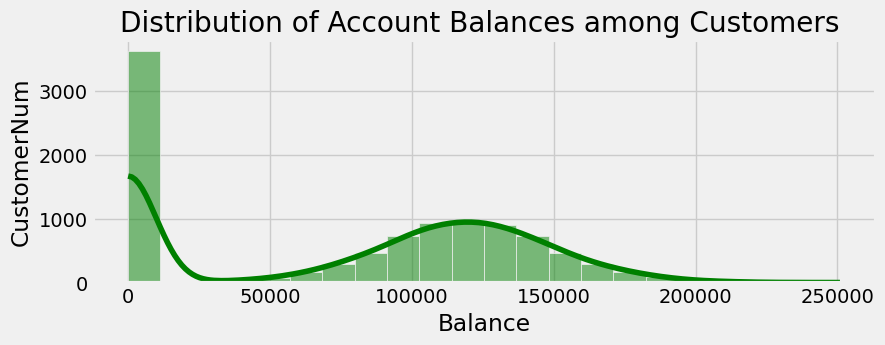

In [ ]:
#Check customer wise balance
plt.figure(figsize=(9, 3))
sns.histplot(df_n['Balance'], kde=True, color='green')
plt.title('Distribution of Account Balances among Customers ')
plt.xlabel('Balance')
plt.ylabel('CustomerNum')
plt.show()

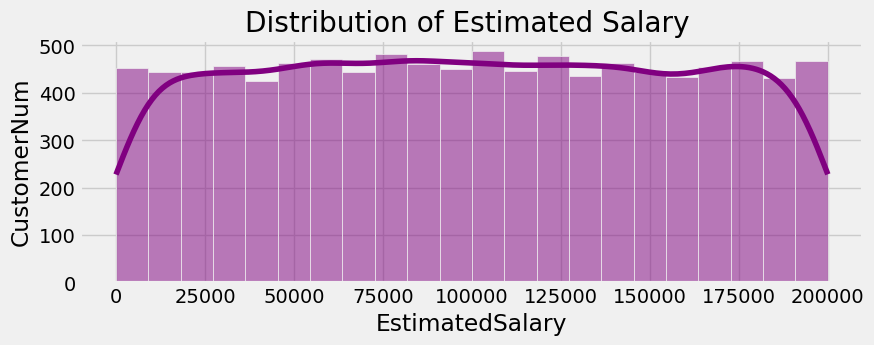

In [ ]:
#Check EstimatedSalary

plt.figure(figsize=(9, 3))
sns.histplot(df_n['EstimatedSalary'], kde=True, color='purple')
plt.title('Distribution of Estimated Salary ')
plt.xlabel('EstimatedSalary')
plt.ylabel('CustomerNum')
plt.show()

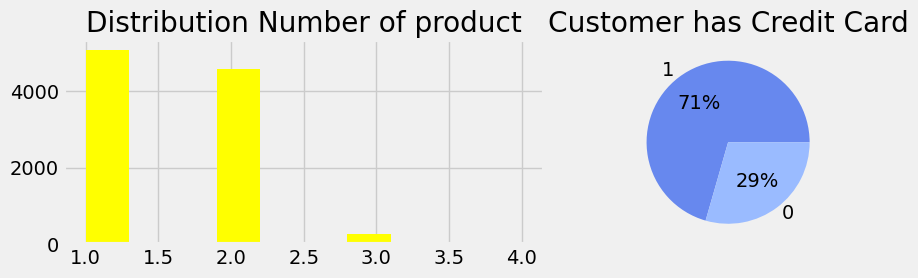

In [ ]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,3))
palette_color = sns.color_palette('coolwarm')
ax[0].hist(x=df['NumOfProducts'],color='yellow')
ax[0].set_title("Distribution Number of product")
ax[1].pie(df_n['HasCrCard'].value_counts(),autopct='%1.f%%',colors=palette_color,labels=['1','0'])
ax[1].set_title("Customer has Credit Card")
plt.tight_layout();

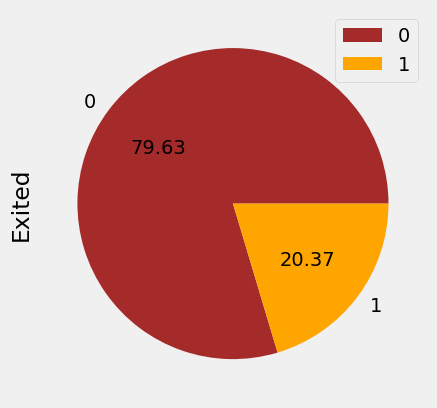

In [ ]:
df_n['Exited'].value_counts().plot(kind='pie',autopct='%.2f',colors=['brown', 'orange'])
plt.legend()
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

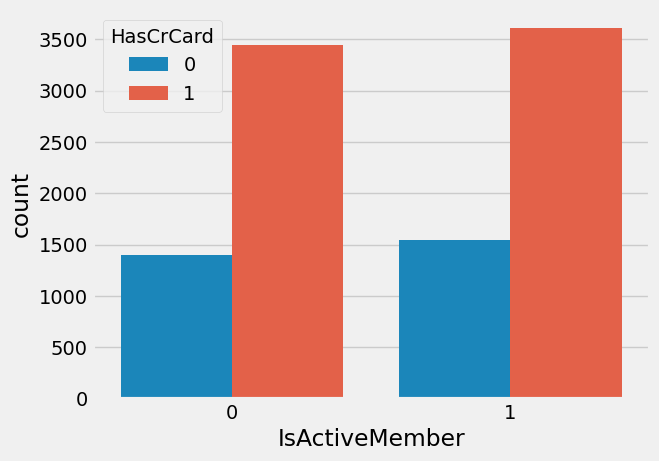

In [ ]:
sns.countplot(data = df_n, x='IsActiveMember', hue='HasCrCard')

<ipython-input-17-2d96dc5e6bba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_n['Tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

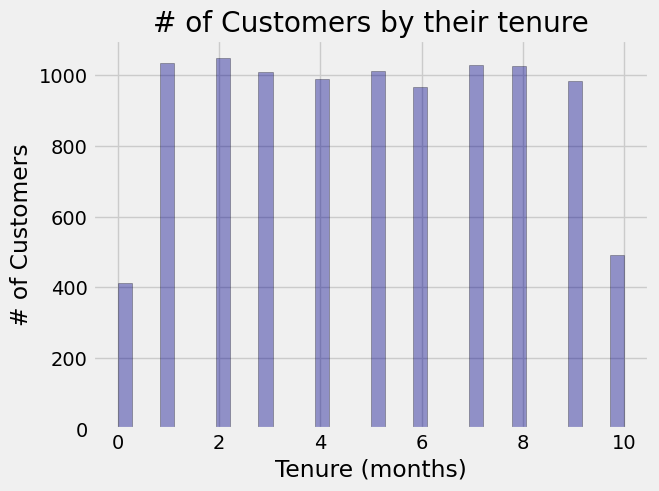

In [ ]:
ax = sns.distplot(df_n['Tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

<ipython-input-34-cdd60a3dc394>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_n.corr(), annot=True, cmap="RdYlBu")


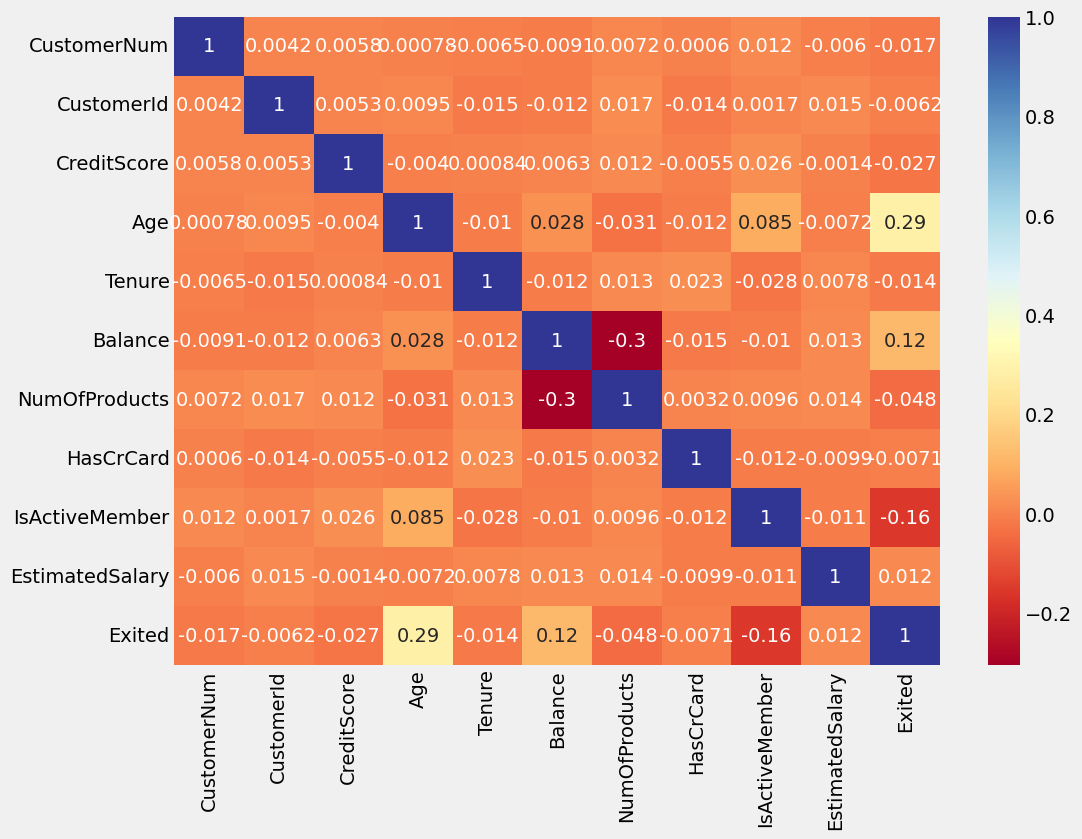

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(df_n.corr(), annot=True, cmap="RdYlBu")
plt.show()

K means


In [ ]:
# x assignment
x = df_n[['CreditScore', 'Age', 'Tenure']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

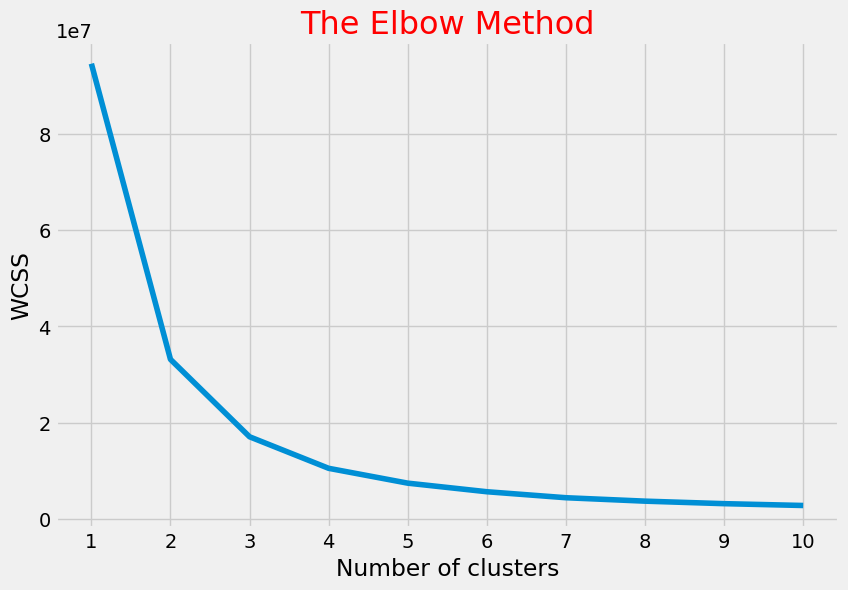

In [ ]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [ ]:
# KMeans
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


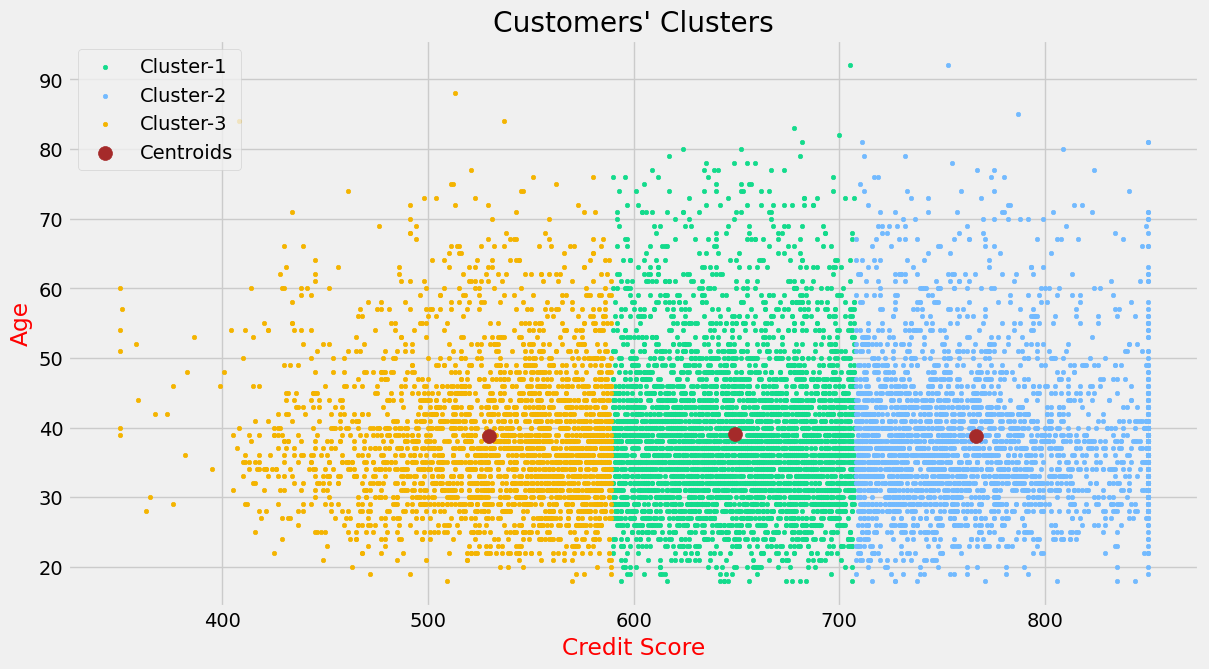

In [ ]:
# Visualize the clusters
plt.figure(figsize=(13, 7))
plt.scatter(x[kmeans.labels_ == 0, 0], x[kmeans.labels_ == 0, 1], s=10, c='#13DB8C', label='Cluster-1')
plt.scatter(x[kmeans.labels_ == 1, 0], x[kmeans.labels_ == 1, 1], s=10, c='#72BAFF', label='Cluster-2')
plt.scatter(x[kmeans.labels_ == 2, 0], x[kmeans.labels_ == 2, 1], s=10, c='#F4B400', label='Cluster-3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='brown', label='Centroids')

plt.title('Customers\' Clusters')
plt.xlabel('Credit Score', color='red')
plt.ylabel('Age', color='red')
plt.legend()
plt.show()

For churn-SVM


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_n.drop("Exited", axis=1)
y = df_n["Exited"]

In [ ]:
#Split data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7975


Random

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [ ]:
# Training the model using the training data
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7615


Text(525.128787878788, 0.5, 'Actual')

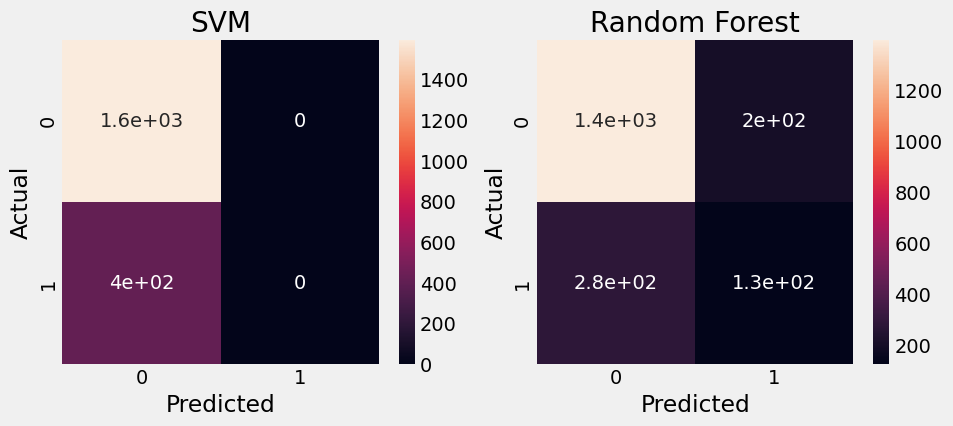

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax[0]).set_title('SVM')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

Naive Bayes

In [ ]:
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1595
           1       0.30      0.08      0.12       405

    accuracy                           0.78      2000
   macro avg       0.55      0.52      0.50      2000
weighted avg       0.70      0.78      0.72      2000



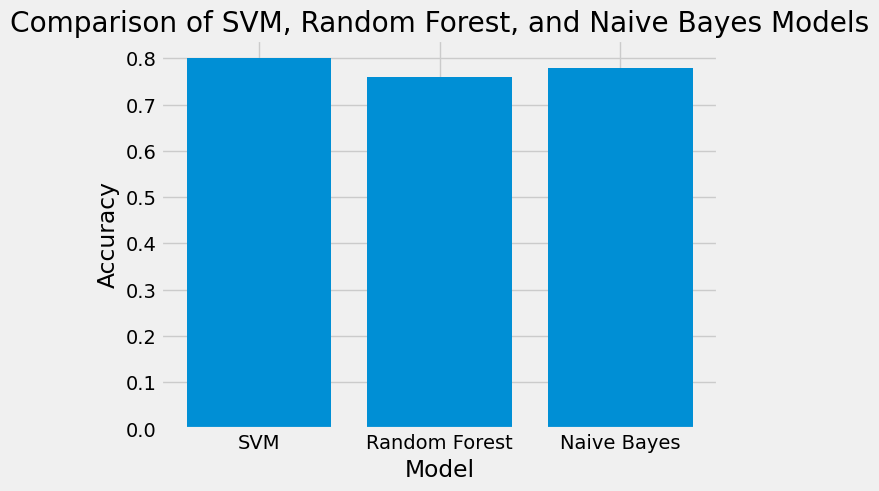

In [ ]:
models = ['SVM', 'Random Forest', 'Naive Bayes']

# Create a list of the accuracies for each model
accuracies = [0.80, 0.76, 0.78]

# Create a bar plot
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM, Random Forest, and Naive Bayes Models')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_naive = GaussianNB()

In [ ]:
scores = cross_val_score(model_naive, X, y, cv=5, scoring='accuracy')
print(scores)

ValueError: ignored